# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [126]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [128]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [129]:
print(browser.title)

Mars Temperature Data


In [130]:
# Get the HTML content of the page
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [131]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [132]:
table = soup.find('table')
rows = table.find_all('tr')

In [133]:
# Extract the header (first row)
header = [th.get_text(strip=True) for th in table.find_all('th')]

In [134]:
print(header)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [135]:
# Extract all rows of data
data = []
for row in table.find_all('tr')[1:]:  # Skip the first row which is header
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)

for row in data:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [136]:
# Create an empty list
list_of_rows = []


# Loop through the scraped data to create a list of rows
list_of_rows.extend(data)

for row in list_of_rows:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [137]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
header = list_of_rows[0]
data = list_of_rows[1:]
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(list_of_rows, columns=column_names)

In [138]:
# Confirm DataFrame was created successfully
df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [139]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [140]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [141]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [142]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
num_months 

12

In [143]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = df.shape[0]
num_martian_days

1867

In [144]:
# 3. What is the average minimum temperature by month?
avg_min_temp_per_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

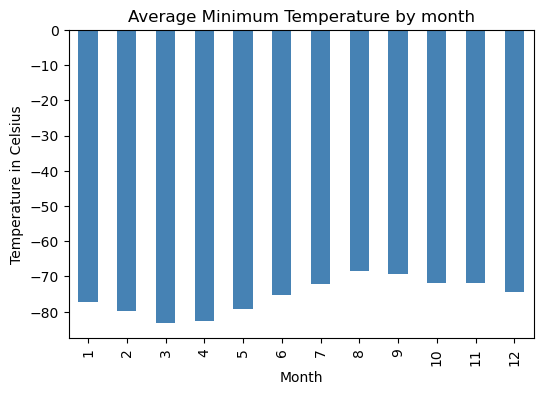

In [145]:
# Plot the average minimum temperature
plt.figure(figsize=(6, 4))
avg_min_temp_per_month.plot(kind='bar', color='steelblue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by month')
plt.xticks(rotation=90)
plt.show()

In [146]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

coldest_month = avg_min_temp_per_month.idxmin()
warmest_month = avg_min_temp_per_month.idxmax()

In [147]:
sorted_avg_min_temp = avg_min_temp_per_month.sort_values()

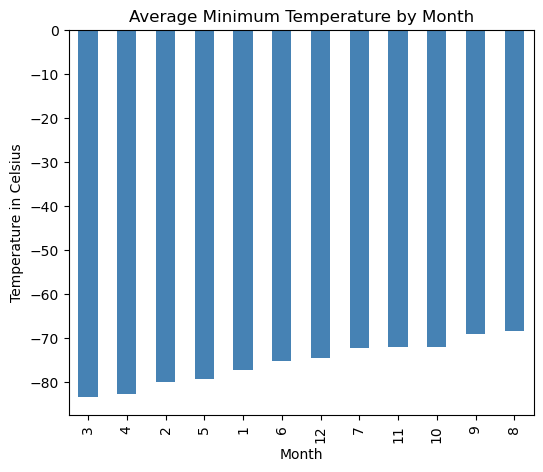

In [148]:
# Plot the sorted average minimum temperature
plt.figure(figsize=(6, 5))
sorted_avg_min_temp.plot(kind='bar', color='steelblue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.xticks(rotation=90)
plt.show()

In [149]:
# 4. What is the average pressure by month?
avg_pressure_per_month = df.groupby('month')['pressure'].mean()
avg_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

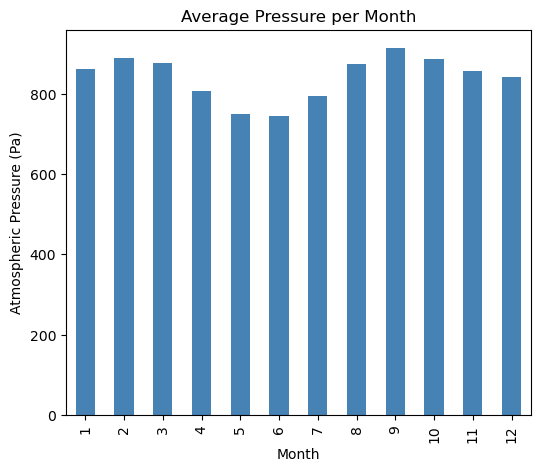

In [150]:
# Plot the average pressure by month

plt.figure(figsize=(6, 5))
avg_pressure_per_month.plot(kind='bar', color='steelblue')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (Pa)')
plt.title('Average Pressure per Month')
plt.xticks(rotation=90)
plt.show()

In [151]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

lowest_pressure_month = avg_pressure_per_month.idxmin()
highest_pressure_month = avg_pressure_per_month.idxmax()

In [152]:
sorted_avg_pressure_per_month = avg_pressure_per_month.sort_values()

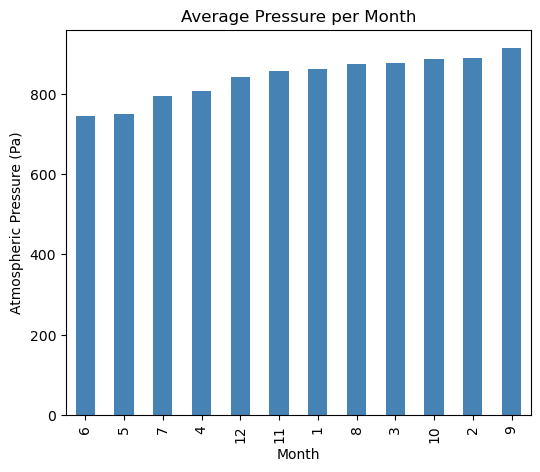

In [153]:
plt.figure(figsize=(6, 5))
sorted_avg_pressure_per_month.plot(kind='bar', color='steelblue')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (Pa)')
plt.title('Average Pressure per Month')
plt.xticks(rotation=90)
plt.show()

In [154]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

df['terrestrial_days'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days


In [155]:
df['min_temp'] = df['min_temp'].astype(float)

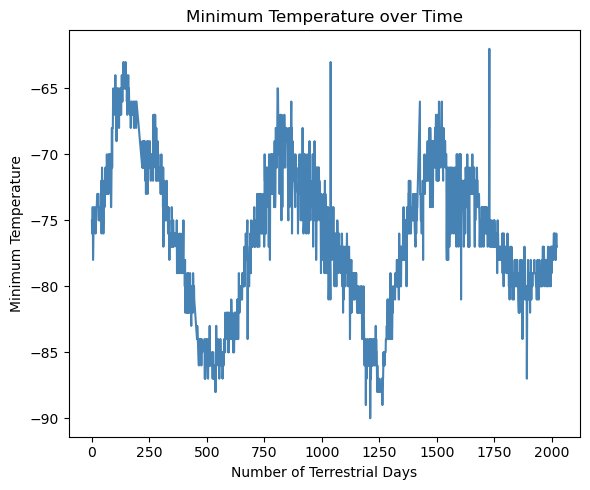

In [156]:
plt.figure(figsize=(6, 5))
plt.plot(df['terrestrial_days'], df['min_temp'], linestyle='-', color='steelblue')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature over Time')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Minimum Temperature

The lowest average minimum temperature is  -68.382979 and this occurs in the eight month of the year (August). This means August is the coldest month. We can also see that after sorting the minimum temperatures, the month with the highest average temperature is march with a temperature of -83.307292. This signifies the warmest month

#### Atmospheric Pressure

The lowest atmospheric pressure is 745.054422 and this occurs in the sixth month of the year (June). We can also see that after sorting the pressures, the month with the highest atmospheric pressure is september with a pressure of 913.305970. 

#### Year Length

The Martian year length is approximately where the min temperature on the graph corresponds to -74.451807 which is the average temperature for the 12th month (December). Based on the graph above, it falls somewhere between 1250 and 1500 terrestrial days. We can approximate that the martian year length is about 1375.5 days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [157]:
import os

# Create output folder
os.makedirs('output', exist_ok=True)

# Write the data to a CSV
df.to_csv('output/mars_temp_data.csv', index=False)


In [158]:
browser.quit()